# Convolutional Neural Networks

In [1]:
# !pip install tensorflow
# !pip install keras

# Prepare Data

In [2]:
import tensorflow as tf
from tensorflow import keras

(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

print(x_train.shape)
print(y_train.shape)

print(x_test.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


In [3]:
y_train = y_train.ravel()
y_test = y_test.ravel()

In [4]:
class_labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

Output class is   1
automobile


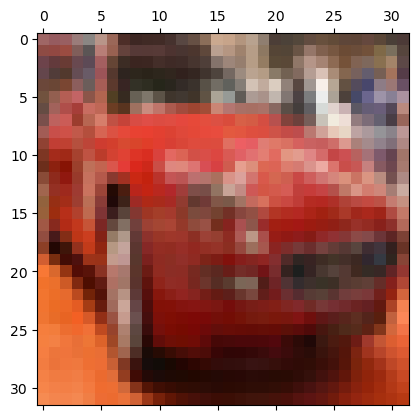

In [5]:
import matplotlib.pyplot as plt

index = 5

plt.matshow(x_train[index])
print("Output class is  ", y_train[index])
print(class_labels[y_train[index]])

## Data Standardization

In [6]:
x_train = x_train / 255.0
x_test = x_test / 255.0

In [7]:
print(x_train[0])

[[[0.23137255 0.24313725 0.24705882]
  [0.16862745 0.18039216 0.17647059]
  [0.19607843 0.18823529 0.16862745]
  ...
  [0.61960784 0.51764706 0.42352941]
  [0.59607843 0.49019608 0.4       ]
  [0.58039216 0.48627451 0.40392157]]

 [[0.0627451  0.07843137 0.07843137]
  [0.         0.         0.        ]
  [0.07058824 0.03137255 0.        ]
  ...
  [0.48235294 0.34509804 0.21568627]
  [0.46666667 0.3254902  0.19607843]
  [0.47843137 0.34117647 0.22352941]]

 [[0.09803922 0.09411765 0.08235294]
  [0.0627451  0.02745098 0.        ]
  [0.19215686 0.10588235 0.03137255]
  ...
  [0.4627451  0.32941176 0.19607843]
  [0.47058824 0.32941176 0.19607843]
  [0.42745098 0.28627451 0.16470588]]

 ...

 [[0.81568627 0.66666667 0.37647059]
  [0.78823529 0.6        0.13333333]
  [0.77647059 0.63137255 0.10196078]
  ...
  [0.62745098 0.52156863 0.2745098 ]
  [0.21960784 0.12156863 0.02745098]
  [0.20784314 0.13333333 0.07843137]]

 [[0.70588235 0.54509804 0.37647059]
  [0.67843137 0.48235294 0.16470588]


In [8]:
print(x_test[0])

[[[0.61960784 0.43921569 0.19215686]
  [0.62352941 0.43529412 0.18431373]
  [0.64705882 0.45490196 0.2       ]
  ...
  [0.5372549  0.37254902 0.14117647]
  [0.49411765 0.35686275 0.14117647]
  [0.45490196 0.33333333 0.12941176]]

 [[0.59607843 0.43921569 0.2       ]
  [0.59215686 0.43137255 0.15686275]
  [0.62352941 0.44705882 0.17647059]
  ...
  [0.53333333 0.37254902 0.12156863]
  [0.49019608 0.35686275 0.1254902 ]
  [0.46666667 0.34509804 0.13333333]]

 [[0.59215686 0.43137255 0.18431373]
  [0.59215686 0.42745098 0.12941176]
  [0.61960784 0.43529412 0.14117647]
  ...
  [0.54509804 0.38431373 0.13333333]
  [0.50980392 0.37254902 0.13333333]
  [0.47058824 0.34901961 0.12941176]]

 ...

 [[0.26666667 0.48627451 0.69411765]
  [0.16470588 0.39215686 0.58039216]
  [0.12156863 0.34509804 0.5372549 ]
  ...
  [0.14901961 0.38039216 0.57254902]
  [0.05098039 0.25098039 0.42352941]
  [0.15686275 0.33333333 0.49803922]]

 [[0.23921569 0.45490196 0.65882353]
  [0.19215686 0.4        0.58039216]


# Keras MLP

In [9]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(32,32,3)),
    keras.layers.Dense(3000, activation = 'relu'),
    keras.layers.Dense(1000, activation = 'relu'),
    keras.layers.Dense(10, activation = 'sigmoid')
])

print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 3072)              0         
                                                                 
 dense (Dense)               (None, 3000)              9219000   
                                                                 
 dense_1 (Dense)             (None, 1000)              3001000   
                                                                 
 dense_2 (Dense)             (None, 10)                10010     
                                                                 
Total params: 12,230,010
Trainable params: 12,230,010
Non-trainable params: 0
_________________________________________________________________
None


In [10]:
model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 118s 75ms/step - loss: 1.8829 - accuracy: 0.3286
Epoch 2/5
1563/1563 [==============================] - 113s 73ms/step - loss: 1.6549 - accuracy: 0.4055
Epoch 3/5
1563/1563 [==============================] - 114s 73ms/step - loss: 1.5724 - accuracy: 0.4382
Epoch 4/5
1563/1563 [==============================] - 113s 73ms/step - loss: 1.5284 - accuracy: 0.4552
Epoch 5/5
1563/1563 [==============================] - 113s 73ms/step - loss: 1.4894 - accuracy: 0.4681


In [11]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 3s 9ms/step - loss: 1.4862 - accuracy: 0.4717


[1.4861876964569092, 0.4717000126838684]

# Keras CNN

In [12]:
model = keras.Sequential([
    # Feature Extraction
    keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(32,32,3)),
    keras.layers.MaxPooling2D((2,2)),
    
    keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    keras.layers.MaxPooling2D((2,2)),

    # Classification
    keras.layers.Flatten(),
    keras.layers.Dense(64, activation = 'relu'),
    keras.layers.Dense(10, activation = 'sigmoid')
])

print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 2304)              0         
                                                                 
 dense_3 (Dense)             (None, 64)               

In [13]:
model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 30s 19ms/step - loss: 1.4813 - accuracy: 0.4667
Epoch 2/5
1563/1563 [==============================] - 30s 19ms/step - loss: 1.1221 - accuracy: 0.6045
Epoch 3/5
1563/1563 [==============================] - 29s 19ms/step - loss: 0.9770 - accuracy: 0.6586
Epoch 4/5
1563/1563 [==============================] - 29s 19ms/step - loss: 0.8882 - accuracy: 0.6925
Epoch 5/5
1563/1563 [==============================] - 29s 18ms/step - loss: 0.8204 - accuracy: 0.7146


In [14]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 2s 5ms/step - loss: 0.9361 - accuracy: 0.6816


[0.9360663890838623, 0.6815999746322632]

# Detailed Evaluation

In [15]:
import numpy as np

y_pred = model.predict(x_test)
y_pred = np.argmax(y_pred, axis=1)

313/313 [==============================] - 2s 5ms/step


In [16]:
from sklearn.metrics import classification_report

print( classification_report(y_pred, y_test) )

              precision    recall  f1-score   support

           0       0.72      0.67      0.70      1071
           1       0.82      0.78      0.80      1052
           2       0.52      0.60      0.56       877
           3       0.44      0.56      0.49       797
           4       0.58      0.68      0.62       856
           5       0.56      0.66      0.60       842
           6       0.83      0.67      0.74      1245
           7       0.73      0.78      0.75       948
           8       0.88      0.65      0.75      1356
           9       0.72      0.76      0.74       956

    accuracy                           0.68     10000
   macro avg       0.68      0.68      0.68     10000
weighted avg       0.70      0.68      0.69     10000

